## Variational Zero-inflated Gaussian Processes in GPFlow

In [1]:
import tensorflow as tf
import gpflow as gpf
from onoffgpf import OnOffSVGP, OnOffLikelihood
from onoffgpf.PlotOnOff1D import PlotOnOff1D

In [2]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

** Load simulated dataset **

In [3]:
matdata = sio.loadmat('data/toydata.mat')
Xtrain = matdata['x']
Ytrain = matdata['y']

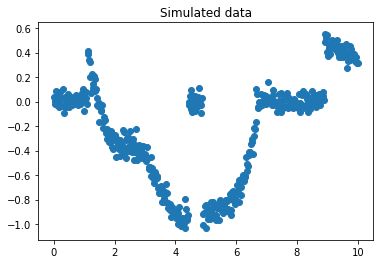

In [4]:
plt.scatter(Xtrain,Ytrain)
plt.title("Simulated data")
plt.show()

**Train specifications & variable initializations**

In [5]:
num_iterations = 8000
num_inducing   = 10

# initalize kernel parameters
kf = gpf.kernels.RBF(1)
kf.lengthscales = 2.
kf.variance = 1.

kg = gpf.kernels.RBF(1)
kg.lengthscales = 2.
kg.variance = 5.

# initialise equally spaced inducing point locations
Zf = np.delete(np.linspace(min(Xtrain),max(Xtrain),num_inducing,endpoint=False),0).transpose().reshape(-1,1)
Zg = np.delete(np.linspace(min(Xtrain),max(Xtrain),num_inducing,endpoint=False),0).transpose().reshape(-1,1)

** Model build and training **

In [6]:
# model definition
m = OnOffSVGP(Xtrain, Ytrain
              ,kernf=kf,kerng=kg
              ,likelihood = OnOffLikelihood()
              ,Zf = Zf,Zg = Zg
              ,q_diag = True
             )

# fix the model noise term
m.likelihood.variance = 0.01
m.likelihood.variance.fixed = False

In [7]:
m.optimize(maxiter = num_iterations) #,method= tf.train.AdamOptimizer(learning_rate = 0.01)
m.compute_log_likelihood()

488.7130771963765

** Mode fit visualization **

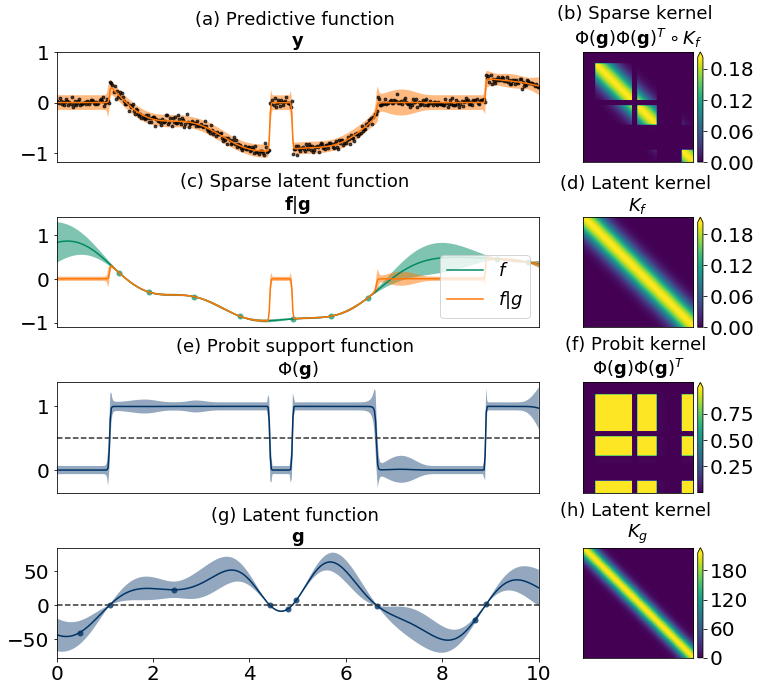

In [8]:
# model plot
PlotOnOff1D(m)